# Importing required libraries and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# **Loading the dataset**

In [42]:
df = pd.read_csv(r'/kaggle/input/student-habit-academic-performance/student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


# **Inspecting the dataset for missing and null values**

In [3]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

Parental_Education_level has null values only

# **Filling missing values**

In [4]:
mode = df['parental_education_level'].mode()[0]
df['parental_education_level'] = df['parental_education_level'].fillna(mode)

In [5]:
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

# **Visualization of category columns**

In [6]:
category_col = [
                    'gender','part_time_job','diet_quality','parental_education_level',
                    'internet_quality','extracurricular_participation'
]

category_col

['gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

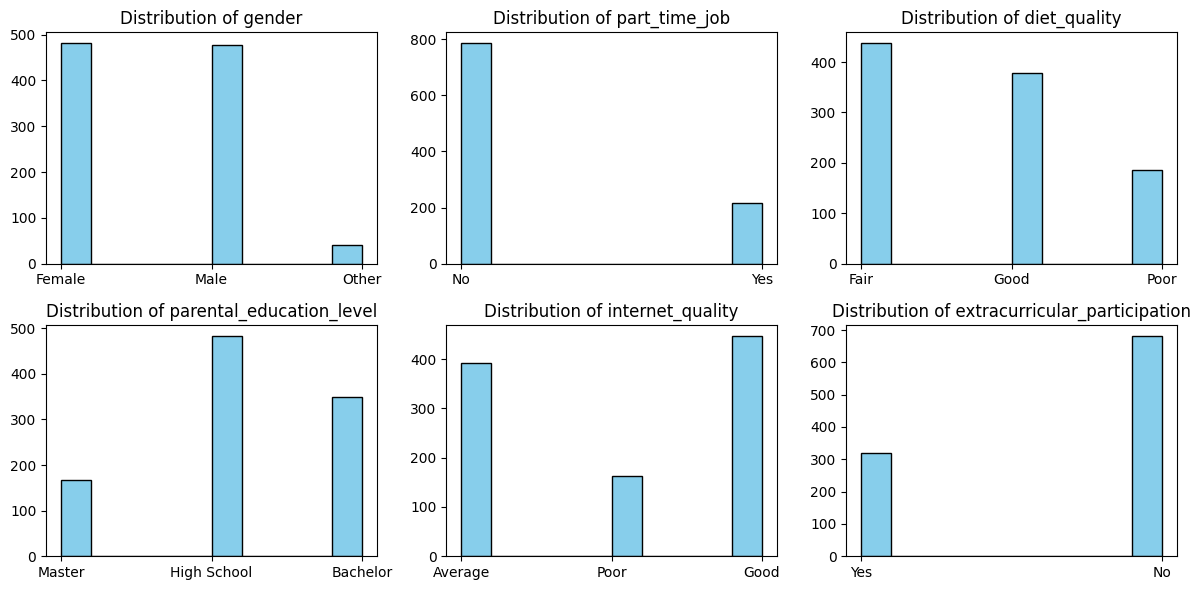

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for idx,column in enumerate(category_col):
    row = idx//3
    col = idx%3
    axes[row][col].hist(df[column],color = 'skyblue',edgecolor = 'black')
    axes[row][col].set_title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

# Visualization of Numerical Columns

In [8]:
numeric_col = df.select_dtypes(exclude = 'object').columns
numeric_col = [col for col in numeric_col]
numeric_col

['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating',
 'exam_score']

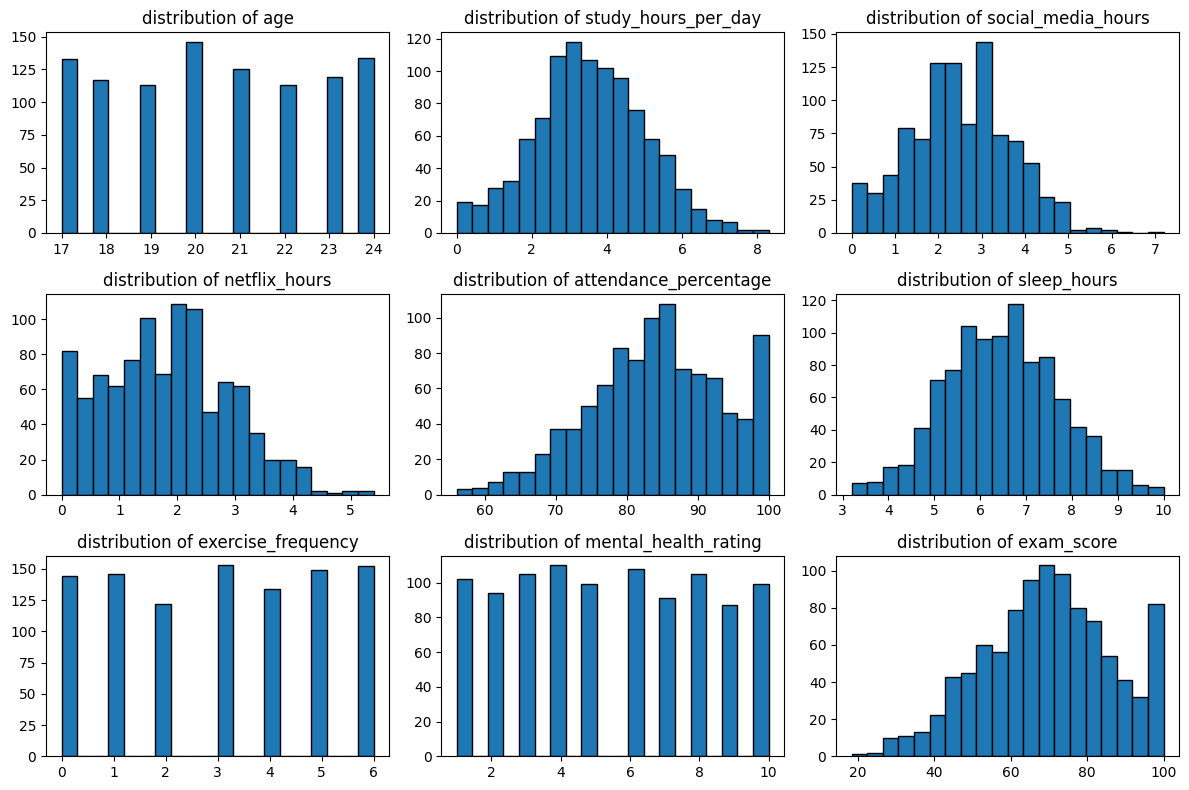

In [9]:
fig,axes = plt.subplots(3,3,figsize=(12,8))

for idx,column in enumerate(numeric_col):
    row = idx//3
    col = idx%3
    axes[row][col].hist(df[column],bins = 20, edgecolor = 'black')
    axes[row][col].set_title(f'distribution of {column}')

plt.tight_layout()
plt.show()

# Feature Engineering

In [10]:
df2 = df.drop('student_id',axis = 1)

In [11]:
df2.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


# Encoding Category columns

In [12]:
df2[category_col].describe()

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,1000,1000,1000
unique,3,2,3,3,3,2
top,Female,No,Fair,High School,Good,No
freq,481,785,437,483,447,682


In [13]:
diet_quality = {'Poor': 0, 'Fair': 1, 'Good': 2}
parental_education_level = {'High School' : 0, 'Bachelor' : 1, 'Master' : 2}
internet_quality  = {'Poor' : 0, 'Average' : 1, 'Good' : 2}

In [14]:
df2['dq_e'] = df2['diet_quality'].map(diet_quality)
df2['pel_e'] = df2['parental_education_level'].map(parental_education_level)
df2['iq_e'] = df2['internet_quality'].map(internet_quality)

In [15]:
dummies = pd.get_dummies(df2[['gender','part_time_job','extracurricular_participation']], drop_first = True)

In [16]:
dummies.head()

,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,False,False,False,True
1,False,False,False,False
2,True,False,False,False
3,False,False,False,True
4,False,False,False,False


False means gender is female or part time job is not and extra curricular participation is no or vice versa

In [17]:
df3 = pd.concat([df2,dummies],axis = True)

In [18]:
df3.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,...,mental_health_rating,extracurricular_participation,exam_score,dq_e,pel_e,iq_e,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,...,8,Yes,56.2,1,2,1,False,False,False,True
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,...,8,No,100.0,2,0,1,False,False,False,False
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,...,1,No,34.3,0,0,0,True,False,False,False
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,...,1,Yes,26.8,0,2,2,False,False,False,True
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,...,1,No,66.4,1,2,2,False,False,False,False


In [19]:
df3 = df3.drop(['gender','part_time_job','extracurricular_participation','diet_quality','parental_education_level','internet_quality'],axis = 1)

In [20]:
df3.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,dq_e,pel_e,iq_e,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,1,2,1,False,False,False,True
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,2,0,1,False,False,False,False
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,0,0,0,True,False,False,False
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,2,2,False,False,False,True
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,1,2,2,False,False,False,False


In [22]:
df3.shape

(1000, 16)

# Model Preparation

In [23]:
x = df3.drop('exam_score',axis = 1)
y = df3['exam_score']
x.shape,y.shape

((1000, 15), (1000,))

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled.shape

(1000, 15)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 15), (200, 15), (800,), (200,))

In [26]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [29]:
y_pred = model.predict(X_test)

In [30]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 38.87680002000004
R^2 Score: 0.84839161925681


# Comparision of result and prediction

In [31]:
comparision_df = pd.DataFrame({
    'Actual Score':y_test.values,
    'predicted score':y_pred
})

In [33]:
comparision_df = comparision_df.round(2)

In [34]:
comparision_df.head(10)

,Actual Score,predicted score
0,64.2,66.67
1,72.7,87.31
2,79.0,78.53
3,79.5,72.89
4,58.2,56.86
5,53.4,61.33
6,70.8,67.91
7,62.5,59.06
8,36.8,46.67
9,67.6,75.34


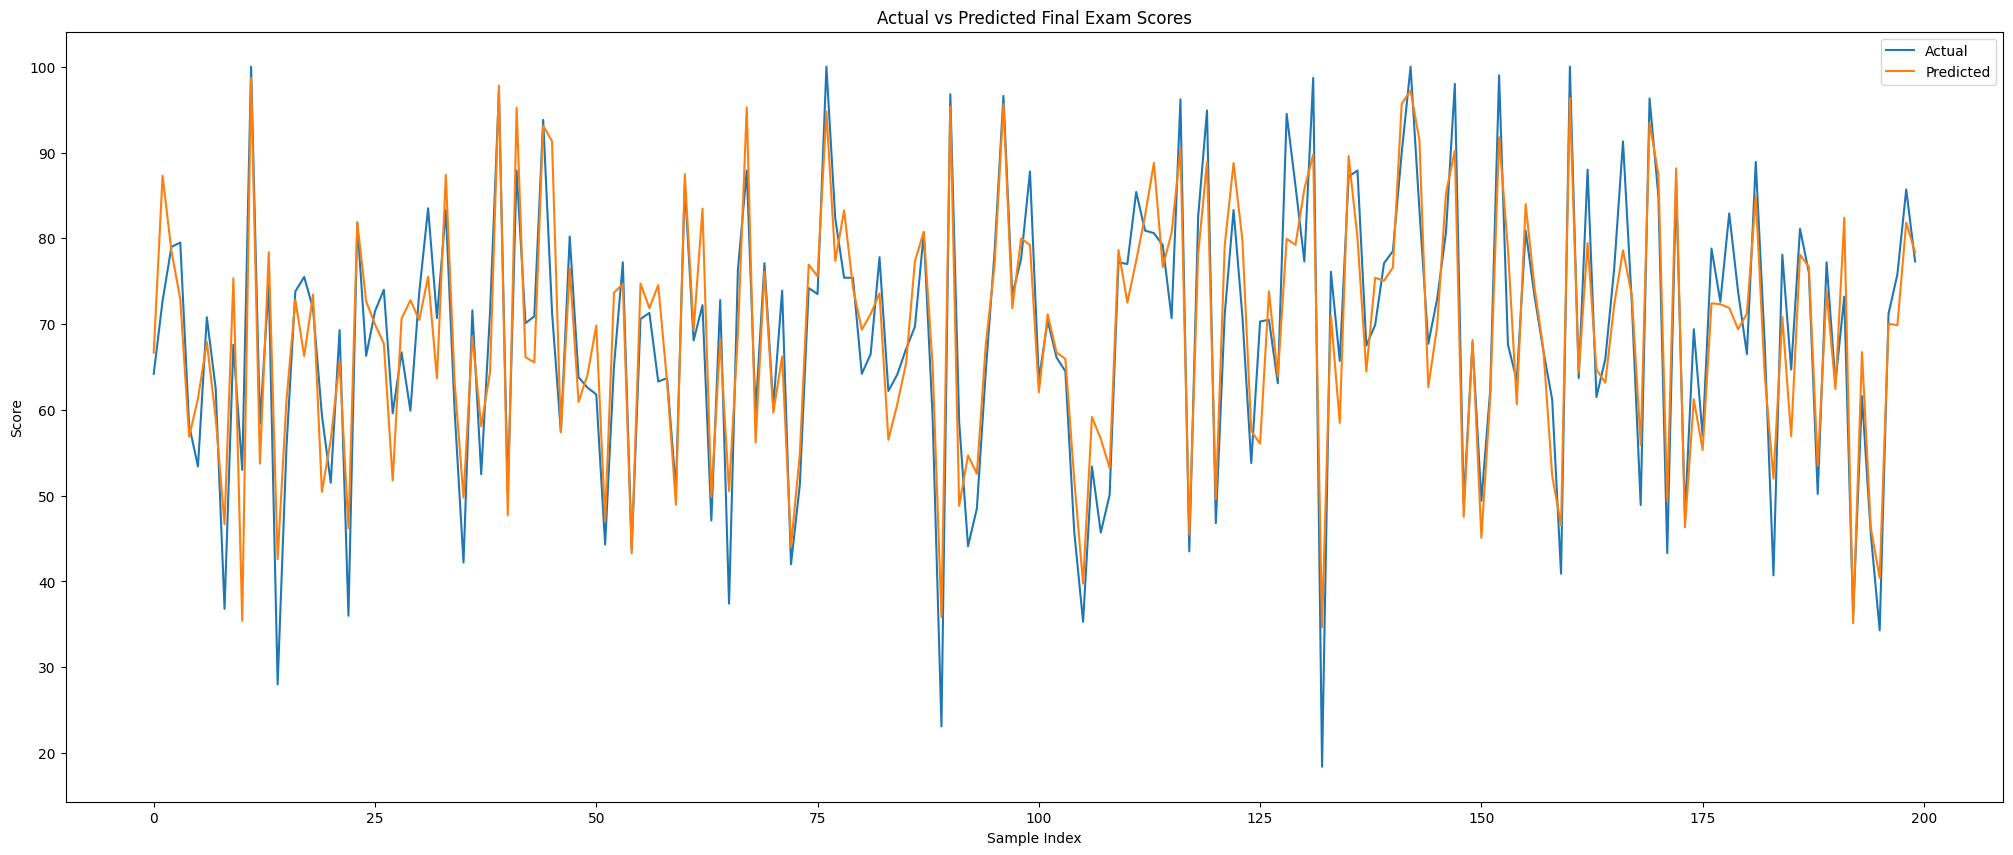

In [41]:
plt.figure(figsize=(25,10))
plt.plot(comparision_df['Actual Score'].values, label='Actual')
plt.plot(comparision_df['predicted score'].values, label='Predicted')
plt.title("Actual vs Predicted Final Exam Scores")
plt.xlabel("Sample Index")
plt.ylabel("Score")
plt.legend()
plt.show()